In [1]:
import sys
sys.path.insert(0, '../dev_experiments/lib_REST_API/')


In [2]:
from evaluate_marks import EvaluateMarks
import matplotlib

In [3]:
import pandas as pd

questions = pd.read_csv("./data/questions.csv", sep=",")
expected_answers = pd.read_csv("./data/expected_answers.csv", sep=",")
observed_answers = pd.read_csv("./data/observed_answers.csv", sep=",")
results = pd.read_csv("./data/results.csv", sep=",")
overall_results = pd.read_csv("./data/overall_result.csv", sep=",")

In [4]:
questions.head()

,question_id,question_text,marks
0,1,What is the difference between a text and a binary file?,2
1,2,Explain types of topology.,5
2,3,What is a database? Write the difference between DDL and DML commands.,4


In [5]:
len(expected_answers)
expected_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   question_id  3 non-null      int64  
 1   answer1      3 non-null      object 
 2   answer2      3 non-null      object 
 3   answer3      1 non-null      object 
 4   answer4      0 non-null      float64
 5   answer5      0 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 272.0+ bytes


In [6]:
expected_answers = expected_answers.fillna("")
expected_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   question_id  3 non-null      int64 
 1   answer1      3 non-null      object
 2   answer2      3 non-null      object
 3   answer3      3 non-null      object
 4   answer4      3 non-null      object
 5   answer5      3 non-null      object
dtypes: int64(1), object(5)
memory usage: 272.0+ bytes


In [7]:
observed_answers = observed_answers.fillna("")
observed_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Student_id   24 non-null     object
 1   question_id  24 non-null     int64 
 2   answers      24 non-null     object
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes


In [8]:
results = results.fillna(0)
results.head()

,student_id,question_id,expected_marks,observed_marks
0,nm1,1,2.0,0.0
1,nm1,2,5.0,0.0
2,nm1,3,1.0,0.0
3,nm2,1,1.5,0.0
4,nm2,2,3.5,0.0


In [9]:
overall_results = overall_results.fillna(0)
overall_results.head()

,student_id,expected_total_marks,observed_total_marks
0,nm1,8.0,0.0
1,nm2,7.0,0.0
2,nm3,10.0,0.0
3,nm4,6.0,0.0
4,m1,5.0,0.0


In [10]:
observed_answers.query("Student_id == 'nm1' and question_id==1")['answers'][0]

'Text file: Text files are human readable forms. The extension of text file is .txt. No module is required for text file. The modes required for text files are r, w, a, r+, w+, a+. Ex:- Note.txt, Example.txt.\nBinary file: Binary files are non-human readable. Binary files have extension of .dat. Pickle module is required for binary files. The modes required for binary files are rb, wb, ab, rb+, wb+, Ex:- '

In [11]:
questions[questions["question_id"]==1].marks[0]

2

In [12]:
# test
s = 'nm1'
q = 1
answer = observed_answers.query(f"Student_id == '{s}' and question_id=={q}")['answers'].values[0]
t_m = questions[questions["question_id"]==q].marks.values[0]

eval = EvaluateMarks(q, t_m, query=answer, grammar=False, database=expected_answers)
marks = eval.evaluate()
print(marks)
print(eval.run_checks())

0.16666666666666666
{'score': 1.0, 'tag': 'Non-Toxic'}
[0.6980878710746765, 0.16666666666666666, 1.0, 0.0, 0]


In [13]:
results

,student_id,question_id,expected_marks,observed_marks
0,nm1,1,2.0,0.0
1,nm1,2,5.0,0.0
2,nm1,3,1.0,0.0
3,nm2,1,1.5,0.0
4,nm2,2,3.5,0.0
5,nm2,3,2.5,0.0
6,nm3,1,2.0,0.0
7,nm3,2,5.0,0.0
8,nm3,3,3.0,0.0
9,nm4,1,2.0,0.0


0.16666666666666666
1   ('nm1', 1)  - completed
0.1388888888888889
2   ('nm1', 2)  - completed
0.2
sub_satisfy
3   ('nm1', 3)  - completed
0.14285714285714285
4   ('nm2', 1)  - completed
0.1095890410958904
5   ('nm2', 2)  - completed
0.20930232558139536
sub_satisfy
6   ('nm2', 3)  - completed
0.125
7   ('nm3', 1)  - completed
0.14444444444444443
8   ('nm3', 2)  - completed
0.21428571428571427
9   ('nm3', 3)  - completed
0.18867924528301888
10   ('nm4', 1)  - completed
0.15730337078651685
11   ('nm4', 2)  - completed
0.20930232558139536
sub_satisfy
12   ('nm4', 3)  - completed
0.1
13   ('m1', 1)  - completed
0.1
14   ('m1', 2)  - completed
15   ('m1', 3)  - completed
0.1694915254237288
16   ('m2', 1)  - completed
0.1724137931034483
17   ('m2', 2)  - completed
0.13953488372093023
18   ('m2', 3)  - completed
0.21666666666666667
19   ('m3', 1)  - completed
0.0970873786407767
20   ('m3', 2)  - completed
0.19230769230769232
21   ('m3', 3)  - completed
0.1836734693877551
22   ('m4', 1)  - com

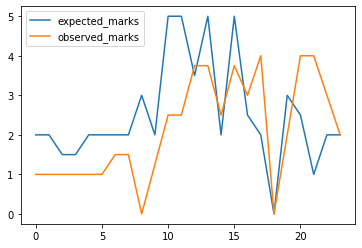

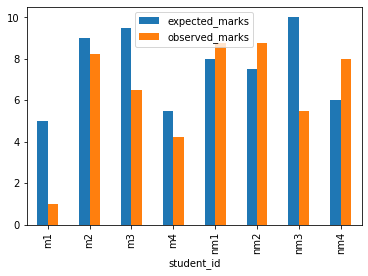

In [14]:
toxic = []
for c,(s,q) in enumerate(list(zip(results['student_id'],results['question_id']))):
    answer = observed_answers.query(f"Student_id == '{s}' and question_id=={q}")['answers'].values[0]
    if answer:
        t_m = questions[questions["question_id"]==q].marks.values[0]
        eval = EvaluateMarks(q, t_m, query=answer, grammar=False, database=expected_answers)
        marks = eval.evaluate()
        if marks['tag'] == 'Toxic':
            toxic.append((s,q))
        i = results.query(f"student_id == '{s}' and question_id=={q}")['observed_marks'].index.values[0]
        observed_marks = marks['score']
    else:
        observed_marks = 0.0
    results.at[i,'observed_marks'] = observed_marks
    print(c+1, " ", (s,q), " - completed")
results.to_csv("eval_results_sub.csv")
print(toxic)
print(results.sort_values(by=['question_id']).reset_index()[['expected_marks', 'observed_marks']].plot.line())
print(results.groupby("student_id").sum(['expected_marks', "observed_marks"])[['expected_marks', "observed_marks"]].plot.bar())

In [15]:
results

,student_id,question_id,expected_marks,observed_marks
0,nm1,1,2.0,1.00
1,nm1,2,5.0,3.75
2,nm1,3,1.0,4.00
3,nm2,1,1.5,1.00
4,nm2,2,3.5,3.75
5,nm2,3,2.5,4.00
6,nm3,1,2.0,1.00
7,nm3,2,5.0,2.50
8,nm3,3,3.0,2.00
9,nm4,1,2.0,1.50


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


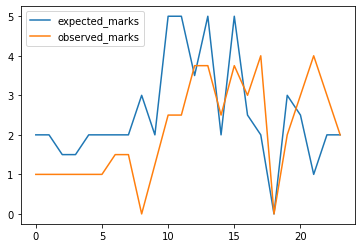

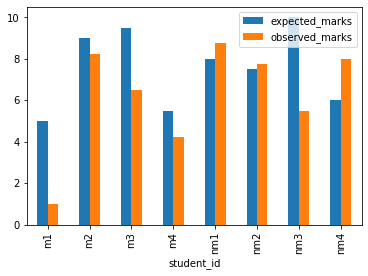

In [44]:
results = pd.read_csv("eval_results_4.csv")
print(results.sort_values(by=['question_id']).reset_index()[['expected_marks', 'observed_marks']].plot.line())
print(results.groupby("student_id").sum(['expected_marks', "observed_marks"])[['expected_marks', "observed_marks"]].plot.bar())

In [45]:
results['total_marks'] = results['question_id'].apply(lambda x: questions[questions["question_id"]==x].marks.values[0])

In [46]:
results.head()

,Unnamed: 0,student_id,question_id,expected_marks,observed_marks,total_marks
0,0,nm1,1,2.0,1.00,2
1,1,nm1,2,5.0,3.75,5
2,2,nm1,3,1.0,4.00,4
3,3,nm2,1,1.5,1.00,2
4,4,nm2,2,3.5,3.75,5


In [47]:
results['difference'] = abs(results["observed_marks"] - results["expected_marks"])

In [48]:
results

,Unnamed: 0,student_id,question_id,expected_marks,observed_marks,total_marks,difference
0,0,nm1,1,2.0,1.00,2,1.00
1,1,nm1,2,5.0,3.75,5,1.25
2,2,nm1,3,1.0,4.00,4,3.00
3,3,nm2,1,1.5,1.00,2,0.50
4,4,nm2,2,3.5,3.75,5,0.25
5,5,nm2,3,2.5,3.00,4,0.50
6,6,nm3,1,2.0,1.00,2,1.00
7,7,nm3,2,5.0,2.50,5,2.50
8,8,nm3,3,3.0,2.00,4,1.00
9,9,nm4,1,2.0,1.50,2,0.50


In [49]:
results['difference'].describe()

count    24.000000
mean      1.083333
std       0.880547
min       0.000000
25%       0.500000
50%       1.000000
75%       1.250000
max       3.000000
Name: difference, dtype: float64

<AxesSubplot: >

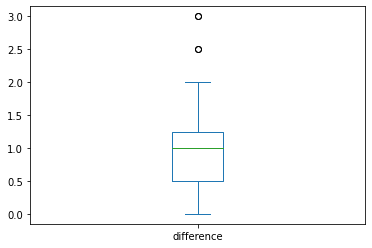

In [50]:
results["difference"].plot.box()

In [ ]:
Things pointed out in the experiment preview:
-> subset of whole answer not marked accurately
-> min distance criteria not accurate
-> sometimes case sensitivity is important
-> defined numbers may not be detected
-> examples have separate marks (and they can belong to any set)
-> interchange data while explaining two different phenomenons, we can still get a good similarity match.
-> if two questions are asked at once, then student may answer anyone of the question first.
-> explaining through diagram labels
-> use custom abbrevs defined within the answer
-> referencing other parts of the answer using words like 'same as', or 'similarly'.
-> ma'am awarded marks just for mentioning the keywords in some cases.. causing discrepancy